# Assessment Task 1

## Set up environment

In [1]:
# Load required packages
import pandas as pd
import numpy as np
from joblib import dump
from joblib import load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport

## Get data

In [2]:
# Import and inspect training data
df_train = pd.read_csv('../../data/raw/train.csv')
#display(df_train)

# Import and inspect test data
df_test = pd.read_csv('../../data/raw/test.csv')
#display(df_test)

## Data exploration

## Data manipulation

In [3]:
# Drop ID column - training data
df_train = df_train.drop(['Id_old','Id'], axis=1)

# Identify target
features = df_train.iloc[:,:-1].to_numpy()
target = df_train.iloc[:,-1].to_numpy()

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Save scaler into models folder
dump(scaler, '../../models/David/scaler.joblib')

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=8)

In [4]:
# Resample training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [5]:
# Drop ID column - test data
df_test = df_test.drop(['Id_old','Id'], axis=1)

# Standardize features - test data
X_test = scaler.fit_transform(df_test)

In [6]:
# Save split datasets into data folder
#np.save('../../data/processed/X_train', X_train)
#np.save('../../data/processed/X_train_res', X_train_res)
#np.save('../../data/processed/X_val', X_val)
#np.save('../../data/processed/y_train', y_train)
#np.save('../../data/processed/y_train_res', y_train_res)
#np.save('../../data/processed/y_val', y_val)
#np.save('../../data/processed/X_test', X_test)

## Set up experiment space

In [7]:
def plot_cm_roc(reg):
    
    # Print confusion matrix to evaluate classification accuracy
    plot_confusion_matrix(reg, X_train, y_train, 
                          cmap=plt.cm.Blues,
                          colorbar=False,
                          normalize='true')
    plt.title("Confusion matrix - Training data")
    plt.show() 

    plot_confusion_matrix(reg, X_val, y_val,
                          cmap=plt.cm.Blues,
                          colorbar=False,
                          normalize='true')
    plt.title("Confusion matrix - Validation data")
    plt.show() 
    
    # Calculate and plot ROC_AUC
    y_score = reg.predict_proba(X_val)[:,1]
    roc_auc_val = roc_auc_score(y_val, y_score)
    print("ROC_AUC:", roc_auc_val)
    reg_disp = plot_roc_curve(reg, X_val, y_val)

In [8]:
def fit_predict_save(reg, name):
    
    # Fit classifier
    reg.fit(X_train, y_train)
    print("Classifier fit complete.")
    
    # Model predictions on training and validation data
    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    print("Model predictions complete.")
    
    # Save fitted model into model folder
    save_path = ('../../models/David/'"%s"'.joblib' % name) 
    dump(reg,  save_path)
    print("Model saved.")

## Experimentation

### Linear SVC

In [ ]:
from sklearn.svm import SVC

reg = SVC(kernel = 'linear', probability=True)

#linear_svc.fit(X_train, y_train)

In [ ]:
fit_predict_save(reg, 'linear_svc')

In [ ]:
plot_cm_roc(reg)

### K Neighbours

In [ ]:
# Create and fit classifier
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
fit_predict_save(reg, 'neigh_res')

In [ ]:
plot_cm_roc(reg)

### Logistic Regression - default

In [ ]:
# Create and fit classifier
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [ ]:
fit_predict_save(reg, 'log_reg')

In [ ]:
plot_cm_roc(reg)

### Logistic Regression - ElasticNet

In [9]:
# Create and fit classifier
from sklearn.linear_model import LogisticRegression 

reg = LogisticRegression(
    penalty='elasticnet', 
    solver='saga', 
    l1_ratio=0.5)

In [10]:
fit_predict_save(reg, 'log_reg_elastic')

Classifier fit complete.
Model predictions complete.
Model saved.


c:\users\david anker\.virtualenvs\mdsi_adsi_feb21_at1-n_gyw-cp\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


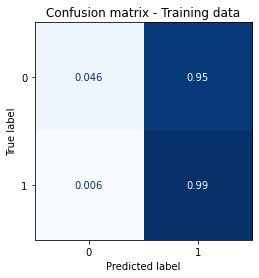

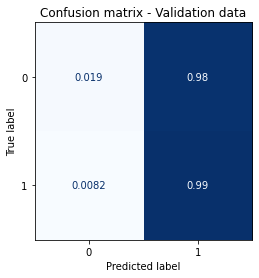

ROC_AUC: 0.7067254621890129


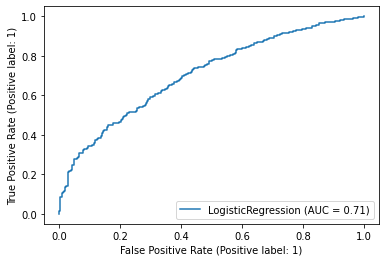

In [11]:
plot_cm_roc(reg)

### Logistic Regression CV

In [ ]:
# Create and fit classifier
from sklearn.linear_model import LogisticRegressionCV 

C_list = np.linspace(0.001, 0.5, 20)

reg = LogisticRegressionCV(
    Cs=C_list, 
    cv=20,
    penalty='l1',
    scoring='roc_auc', 
    solver='liblinear',
    tol=1e-4, 
    max_iter=1000, 
    class_weight='balanced', 
    n_jobs=10, #7
    verbose=2, 
    refit=True, 
    multi_class='ovr', 
    random_state=42)

In [ ]:
fit_predict_save(reg, 'log_reg_cv')

In [ ]:
plot_cm_roc(reg)

### Random Forest - default

In [ ]:
# Create and fit classifier
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()

In [ ]:
fit_predict_save(reg, 'random_forest')

In [ ]:
plot_cm_roc(reg)

### Random Forest - second attempt

In [ ]:
# Create and fit classifier
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(
    n_estimators=5, 
    criterion='entropy', 
    max_depth=15, 
    min_samples_split=3, 
    random_state=42, 
    verbose=1, 
    class_weight='balanced')

In [ ]:
fit_predict_save(reg, 'random_forest2')

In [ ]:
plot_cm_roc(reg)

### SVC - default

In [ ]:
# Create and fit classifier
from sklearn.svm import SVC

reg = SVC(kernel='sigmoid', probability=True)

In [ ]:
fit_predict_save(reg, 'svc')

In [ ]:
plot_cm_roc(reg)

## Calculate and export test data predictions

In [ ]:
# Predict target probabilities (use specific model name)
test_probs = random_forest2.predict_proba(X_test)[:,1]

In [ ]:
# Create dataframe object
test_probs_df = pd.DataFrame(test_probs, columns = ["TARGET_5Yrs"])

# Name 'ID' column
test_probs_df.index.name = "Id"

In [ ]:
# Save output to csv
test_probs_df.to_csv("final2.csv")